**Note to grader:** Each question consists of parts, e.g. Q1(i), Q1(ii), etc. Each part must be graded  on a 0-4 scale, following the standard NJIT convention (A:4, B+: 3.5, B:3, C+: 2.5, C: 2, D:1, F:0). 
The total score must be re-scaled to 100 -- that should apply to all future assignments so that Canvas assigns the same weight on all assignments.

In the case a question is stated to worth 8 points, grade on a 0-4 scale, and multiply by 2.



In [1]:
# Grader's area
import numpy as np
G = np.zeros([10,10])
maxScore = 0


# **Assignment 6**
<br>

<font>

In [2]:
from IPython.display import Math
from IPython.display import Latex

import numpy as np
import os
import struct

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neural_network import MLPClassifier

In [3]:
%matplotlib inline

import torch
import torchvision
import torchvision.transforms as transforms

----------------
----------------
----------------

## <font color='blue'> **Question 1.** Visualizing convergence. </font>

Modify this code so that in every epoch it records:

**a.** The test loss [4 pt] <br>
**b.** The training accuracy [4 pt] <br>
**c.** The test accuracy [4pt] 

Then:

**d.** Run the model for 20 epochs and give two plots (one for losses, one for accuracies) for the convergence behavior over 20 epochs. [4pt]

<br>

**Note:**
Make sure you avoid updating the weights when you use the test set. For that you should consult the notebook from CNNs lecture. 




In [4]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


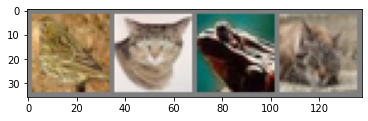

bird  cat   frog  cat  


In [9]:
# Visualizing training images

import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [6]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [7]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [8]:
import pandas as pd

table = [['epoch'],['train_loss'],['test_loss'],['train_acc'],['test_acc']]

for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    train_total = 0
    train_correct = 0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)

        # code to save train accuracy
        _, predicted = torch.max(outputs.data, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()
        train_acc = train_correct / train_total
        
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')

            # code to print and save final train loss
            train_loss_final = running_loss / 2000
          
            running_loss = 0.0

    test_loss = 0.0
    test_steps = 0
    test_total = 0
    test_correct = 0
    for i, data in enumerate(testloader, 0):
        with torch.no_grad():
            inputs, labels = data


            outputs = net(inputs)
            _, predicted = torch.max(outputs.data, 1)
            test_total += labels.size(0)
            test_correct += (predicted == labels).sum().item()
            test_acc = test_correct / test_total

            loss = criterion(outputs, labels)
            test_loss += loss.cpu().numpy()
            test_steps += 1
            test_loss_final = test_loss / test_steps

    # Appending values to table
    table[0].append(epoch + 1)
    table[1].append(train_loss_final)

    # Question 1-a
    #---------------
    table[2].append(test_loss_final)
    # Question 2-b
    #---------------
    table[3].append(train_acc)
    # Question 3-c
    #---------------
    table[4].append(test_acc)

    # Printing values
    print()
    print('epoch:', epoch + 1)
    print('train loss:', train_loss_final)
    print('test loss:', test_loss_final)
    print('train accuracy:', train_acc)
    print('test accuracy:', test_acc)
    print()
    print('-------------------------------------------------------')
    print()

print('Finished Training')

[1,  2000] loss: 2.236
[1,  4000] loss: 1.849
[1,  6000] loss: 1.683
[1,  8000] loss: 1.599
[1, 10000] loss: 1.527
[1, 12000] loss: 1.481

epoch: 1
train loss: 1.4806448920071125
test loss: 1.3931759062349796
train accuracy: 0.36562
test accuracy: 0.5001

-------------------------------------------------------

[2,  2000] loss: 1.391
[2,  4000] loss: 1.382
[2,  6000] loss: 1.354
[2,  8000] loss: 1.315
[2, 10000] loss: 1.300
[2, 12000] loss: 1.295

epoch: 2
train loss: 1.2947390674762427
test loss: 1.2658394972622395
train accuracy: 0.522
test accuracy: 0.5483

-------------------------------------------------------

[3,  2000] loss: 1.224
[3,  4000] loss: 1.225
[3,  6000] loss: 1.197
[3,  8000] loss: 1.201
[3, 10000] loss: 1.191
[3, 12000] loss: 1.195

epoch: 3
train loss: 1.195487530965358
test loss: 1.2228671439640224
train accuracy: 0.57282
test accuracy: 0.5642

-------------------------------------------------------

[4,  2000] loss: 1.103
[4,  4000] loss: 1.105
[4,  6000] loss: 1

In [10]:
# Question 1-d
#---------------
# Converting table to numpy array
new_table = np.asarray(table)
new_table = np.transpose(new_table)

# Converting new table to pandas dataframe
df = pd.DataFrame(new_table)
df = df.T.set_index(0).T
df

,epoch,train_loss,test_loss,train_acc,test_acc
1,1,1.4806448920071125,1.3931759062349796,0.36562,0.5001
2,2,1.2947390674762427,1.2658394972622395,0.522,0.5483
3,3,1.195487530965358,1.2228671439640224,0.57282,0.5642
4,4,1.1101344376076012,1.176236281274259,0.60656,0.5935
5,5,1.038581361984834,1.0967369320736267,0.6334,0.6211
6,6,1.0234205246791244,1.1071191251516341,0.6508,0.6175
7,7,0.9374221322913654,1.110649244285468,0.66992,0.6146
8,8,0.9174657516379375,1.1748972868396435,0.68274,0.6145
9,9,0.8848475336460396,1.163212867506314,0.6923,0.6172
10,10,0.8515463548215776,1.196641148461285,0.70614,0.6129


<Figure size 432x288 with 0 Axes>

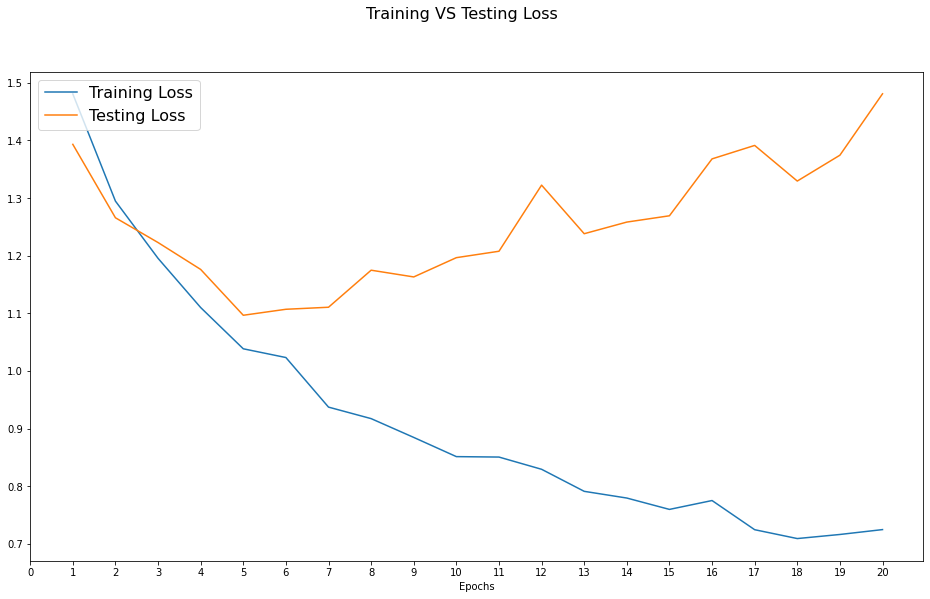

In [11]:
# Question 1-d (cont'd)
#---------------
# Visualize and plotting the losses

df['epoch']=df['epoch'].astype(int)
df['train_loss']=df['train_loss'].astype(float)
df['test_loss']=df['test_loss'].astype(float)

plt.figure()
plt.figure(figsize=(16, 9))
x = df['epoch']
y1 = df['train_loss']
y2 = df['test_loss']
plt.xlabel('Epochs')
plt.plot(x,y1, label='Training Loss')
plt.plot(x,y2, label='Testing Loss')
plt.xticks(np.arange(0, 21, 1))
plt.legend(loc="upper left", prop={'size': 16})
plt.suptitle('Training VS Testing Loss', fontsize=16)
plt.show()

<Figure size 432x288 with 0 Axes>

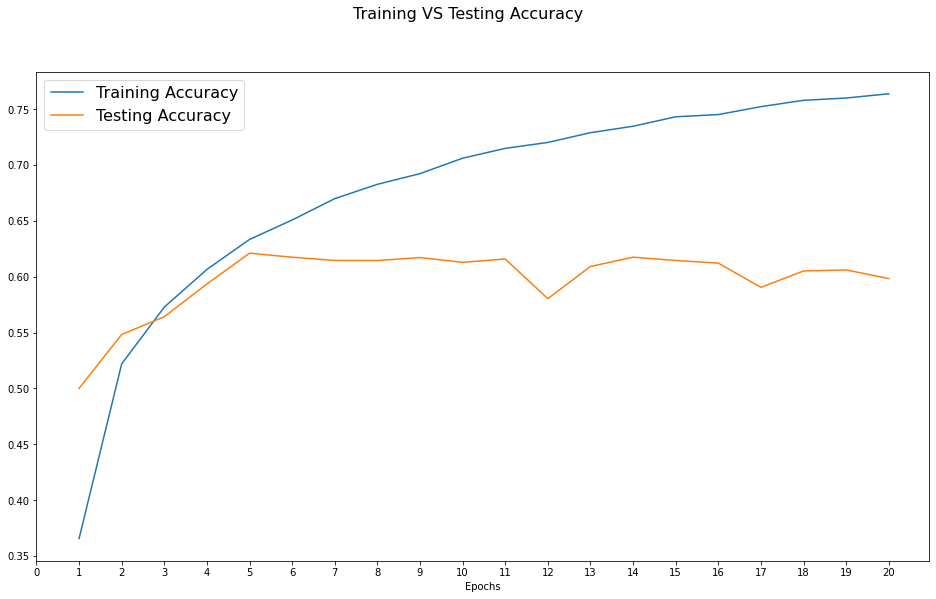

In [12]:
# Question 1-d (cont'd)
#---------------
# Visualize and plotting accuracies

df['epoch']=df['epoch'].astype(int)
df['train_acc']=df['train_acc'].astype(float)
df['test_acc']=df['test_acc'].astype(float)

plt.figure()
plt.figure(figsize=(16, 9))
x = df['epoch']
y1 = df['train_acc']
y2 = df['test_acc']
plt.xlabel('Epochs')
plt.plot(x,y1, label='Training Accuracy')
plt.plot(x,y2, label='Testing Accuracy')
plt.xticks(np.arange(0, 21, 1))
plt.legend(loc="upper left", prop={'size': 16})
plt.suptitle('Training VS Testing Accuracy', fontsize=16)
plt.show()

In [ ]:
# For grader use only

# insert grade here
# G[1,1] =   
# G[1,2] = 
# G[1,3] =
# G[1,4] = 


maxScore = maxScore + 16


------------------------------
------------------------------
------------------------------

## <font color='blue'> **Question 2.** Learning random labels. </font>

Reuse the above code, but instead of using the given input labels on the training set, use random labels. Then run for 40 epochs. 
<br>

**a.** Report the plots for the training accuracy. **[4 pt]** <br>
**b.** What is the final training accuracy? **[4 pt]** <br>
**c.** What would be the expected accuracy for a random baseline model? **[4 pt]**





In [13]:
# Question 2
print(labels)

tensor([2, 3, 6, 3])


In [14]:
# Question 2 (cont'd)
random = np.random.randint(0, 10, size=4)
print(random)

[4 8 3 5]


In [15]:
# Question 2 (cont'd)
random_labels = np.array([[1,2,3,4]])
random_labels = torch.from_numpy(random)
print(random_labels)

tensor([4, 8, 3, 5])


In [16]:
# Question 2 (cont'd)
ran_table = [['epoch'],['train_loss'],['test_loss'],['train_acc'],['test_acc']]

for epoch in range(40):  # loop over the dataset multiple times

    running_loss = 0.0
    train_total = 0
    train_correct = 0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, random_labels]
        inputs, random_labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)

        # code to save train accuracy
        _, predicted = torch.max(outputs.data, 1)
        train_total += random_labels.size(0)
        train_correct += (predicted == random_labels).sum().item()
        train_acc = train_correct / train_total
        
        loss = criterion(outputs, random_labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')

            # code to print and save final train loss
            train_loss_final = running_loss / 2000
          
            running_loss = 0.0

    test_loss = 0.0
    test_steps = 0
    test_total = 0
    test_correct = 0
    for i, data in enumerate(testloader, 0):
        with torch.no_grad():
            inputs, labels = data

            outputs = net(inputs)
            _, predicted = torch.max(outputs.data, 1)
            test_total += labels.size(0)
            test_correct += (predicted == labels).sum().item()
            test_acc = test_correct / test_total

            loss = criterion(outputs, labels)
            test_loss += loss.cpu().numpy()
            test_steps += 1
            test_loss_final = test_loss / test_steps

    # Appending values to ran_table
    ran_table[0].append(epoch + 1)
    ran_table[1].append(train_loss_final)

    # Question 2-a
    #---------------
    ran_table[2].append(test_loss_final)
    # Question 2-b
    #---------------
    ran_table[3].append(train_acc)
    # Question 2-c
    #---------------
    ran_table[4].append(test_acc)

    # Printing values
    print()
    print('epoch:', epoch + 1)
    print('train loss:', train_loss_final)
    print('test loss:', test_loss_final)
    print('train accuracy:', train_acc)
    print('test accuracy:', test_acc)
    print()
    print('-------------------------------------------------------')
    print()

print('Finished Training')

[1,  2000] loss: 0.562
[1,  4000] loss: 0.629
[1,  6000] loss: 0.672
[1,  8000] loss: 0.670
[1, 10000] loss: 0.694
[1, 12000] loss: 0.720

epoch: 1
train loss: 0.720287257506332
test loss: 1.4047836495761061
train accuracy: 0.76804
test accuracy: 0.6055

-------------------------------------------------------

[2,  2000] loss: 0.587
[2,  4000] loss: 0.629
[2,  6000] loss: 0.643
[2,  8000] loss: 0.663
[2, 10000] loss: 0.679
[2, 12000] loss: 0.709

epoch: 2
train loss: 0.7087593836568703
test loss: 1.5108709073775732
train accuracy: 0.7694
test accuracy: 0.5943

-------------------------------------------------------

[3,  2000] loss: 0.578
[3,  4000] loss: 0.611
[3,  6000] loss: 0.608
[3,  8000] loss: 0.669
[3, 10000] loss: 0.664
[3, 12000] loss: 0.669

epoch: 3
train loss: 0.6694457951725526
test loss: 1.42918197988522
train accuracy: 0.77724
test accuracy: 0.601

-------------------------------------------------------

[4,  2000] loss: 0.583
[4,  4000] loss: 0.586
[4,  6000] loss: 0.6

In [17]:
# Question 2 (cont'd)
# Converting table to numpy array
new_table1 = np.asarray(ran_table)
new_table1 = np.transpose(ran_table)

# Converting new table to pandas dataframe
df1 = pd.DataFrame(new_table1)
df2 = df1.T.set_index(0).T
print(df2)

0  epoch          train_loss           test_loss train_acc test_acc
1      1   0.720287257506332  1.4047836495761061   0.76804   0.6055
2      2  0.7087593836568703  1.5108709073775732    0.7694   0.5943
3      3  0.6694457951725526    1.42918197988522   0.77724    0.601
4      4  0.6593436813420267   1.539187965949683   0.77452   0.5967
5      5  0.6604498090146299  1.5258440098429331   0.78072   0.5931
6      6  0.6515187044796621  1.5666796673872638   0.78298    0.593
7      7  0.6755807600092885  1.5735560217873745    0.7822    0.575
8      8  0.6842390911605507  1.6489481138859525   0.78362   0.5932
9      9  0.6583071086893797   1.598967964383727   0.79066   0.5962
10    10  0.6737636936325961  1.5522261047269945    0.7859   0.6021
11    11  0.6704669323700548  1.6920660621250208    0.7873   0.5797
12    12  0.6605045835807468  1.7846443235960323   0.78734   0.5814
13    13  0.6583384034668416   1.655131139365545   0.78904   0.5891
14    14  0.6673266292197695    1.78211773656933

In [20]:
# Question 2 (cont'd)
#---------------

print('Final training accuracy is:', df2['train_acc'][40])

Final training accuracy is: 0.8002


In [21]:
# Question 2 (cont'd)
#---------------

exp_acc = 1/len(classes)
print(f'Expected accuracy for a random baseline model: {100 * exp_acc} %')

Expected accuracy for a random baseline model: 10.0 %


In [ ]:
# For grader use only

# insert grade here
# G[2,1] =   
# G[2,2] = 
# G[2,3] =


maxScore = maxScore + 12


------------------------------
------------------------------
------------------------------

## <font color='blue'> **Question 3.** Modifying the model for MNIST. </font>

Let's now work with the MNIST dataset. 
<br>

**a.** Download and prepare the dataloaders for the standard MNIST dataset. **[4 pt]** <br>
**b.** Modify the model so that it works with the MNIST dataset. The inner array sizes should be roughly similar, but you can adjust them in the way you choose **[8 pt]** <br>
**c.** Report the training and test accuracy after 10 epochs **[4 pt]**





In [22]:
# Question 3
#---------------
#Downloading dataset
from keras.preprocessing.image import ImageDataGenerator

transform = transforms.Compose(
    [transforms.ToTensor(),
     # Modifying normalization values
     transforms.Normalize((0.5), (0.5))])

batch_size = 4

trainset = torchvision.datasets.MNIST(root='/files/', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='/files/', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

In [23]:
# Question 3 (cont'd)
#---------------
# Modifying model to work with MNIST dataset

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # Changing the number of channels from 3 to 1
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(256, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # Flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [24]:
# Question 3 (cont'd)
import pandas as pd

m_table = [['epoch'],['train_loss'],['test_loss'],['train_acc'],['test_acc']]

for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    train_total = 0
    train_correct = 0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, random_labels]
        inputs, random_labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)

        # code to save train accuracy
        _, predicted = torch.max(outputs.data, 1)
        train_total += random_labels.size(0)
        train_correct += (predicted == random_labels).sum().item()
        train_acc = train_correct / train_total
        
        loss = criterion(outputs, random_labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')

            # code to print and save final train loss
            train_loss_final = running_loss / 2000
          
            running_loss = 0.0

    test_loss = 0.0
    test_steps = 0
    test_total = 0
    test_correct = 0
    for i, data in enumerate(testloader, 0):
        with torch.no_grad():
            inputs, labels = data

            outputs = net(inputs)
            _, predicted = torch.max(outputs.data, 1)
            test_total += labels.size(0)
            test_correct += (predicted == labels).sum().item()
            test_acc = test_correct / test_total

            loss = criterion(outputs, labels)
            test_loss += loss.cpu().numpy()
            test_steps += 1
            test_loss_final = test_loss / test_steps

    # Appending values to m_table
    m_table[0].append(epoch + 1)
    m_table[1].append(train_loss_final)
    m_table[2].append(test_loss_final)
    m_table[3].append(train_acc)
    m_table[4].append(test_acc)

    # Printing values
    print()
    print('epoch:', epoch + 1)
    print('train loss:', train_loss_final)
    print('test loss:', test_loss_final)
    print('train accuracy:', train_acc)
    print('test accuracy:', test_acc)
    print()
    print('-------------------------------------------------------')
    print()

print('Finished Training')

[1,  2000] loss: 1.124
[1,  4000] loss: 0.175
[1,  6000] loss: 0.128
[1,  8000] loss: 0.107
[1, 10000] loss: 0.105
[1, 12000] loss: 0.089
[1, 14000] loss: 0.079

epoch: 1
train loss: 0.07884398528596376
test loss: 0.06469880225822199
train accuracy: 0.9185333333333333
test accuracy: 0.9785

-------------------------------------------------------

[2,  2000] loss: 0.068
[2,  4000] loss: 0.063
[2,  6000] loss: 0.056
[2,  8000] loss: 0.054
[2, 10000] loss: 0.066
[2, 12000] loss: 0.053
[2, 14000] loss: 0.051

epoch: 2
train loss: 0.050620828033029114
test loss: 0.04813575785053017
train accuracy: 0.98195
test accuracy: 0.9836

-------------------------------------------------------

[3,  2000] loss: 0.043
[3,  4000] loss: 0.046
[3,  6000] loss: 0.046
[3,  8000] loss: 0.041
[3, 10000] loss: 0.046
[3, 12000] loss: 0.044
[3, 14000] loss: 0.039

epoch: 3
train loss: 0.03921219729639245
test loss: 0.03799861018557393
train accuracy: 0.9859333333333333
test accuracy: 0.987

---------------------

In [25]:
# Question 3 (cont'd)
# Converting table to numpy array
mn_table = np.asarray(m_table)
mn_table = np.transpose(m_table)

# Converting new table to pandas dataframe
df3 = pd.DataFrame(mn_table)
df4 = df3.T.set_index(0).T
print(df4)

0  epoch            train_loss             test_loss           train_acc  \
1      1   0.07884398528596376   0.06469880225822199  0.9185333333333333   
2      2  0.050620828033029114   0.04813575785053017             0.98195   
3      3   0.03921219729639245   0.03799861018557393  0.9859333333333333   
4      4  0.028320815985094505   0.03575887033157603  0.9891666666666666   
5      5  0.026417321328480473  0.051080359454598656  0.9907666666666667   
6      6  0.022787979063036343   0.03695265774919683              0.9924   
7      7   0.02198331138257037   0.02783406399277746  0.9934333333333333   
8      8  0.020940332233979096   0.03233615749103315             0.99435   
9      9  0.018157737128919174  0.028260677075976407  0.9959833333333333   
10    10  0.017867793506005553   0.04544585661977735              0.9954   

0  test_acc  
1    0.9785  
2    0.9836  
3     0.987  
4    0.9886  
5    0.9837  
6    0.9883  
7    0.9908  
8    0.9908  
9    0.9908  
10   0.9872  


In [26]:
# Question 3 (cont'd)
#---------------

print("Final training accuracy is:", df4['train_acc'][10])
print("Final testing accuracy is:", df4['test_acc'][10])

Final training accuracy is: 0.9954
Final testing accuracy is: 0.9872


In [ ]:
# For grader use only

# insert grade here
# G[3,1] =   
# G[3,2] = 
# G[3,3] =


maxScore = maxScore + 16


------------------------------
------------------------------
------------------------------

## <font color='blue'> **Question 4.** MNIST on randomly permuted images. </font>

In this question we will see whether a CNN remains as effective for randomly permuted images. 
<br>

**a.** Find a way to randomly permute the entries of a 2d array in numpy or a 2d tensor in PyTorch. This should be 2-3 lines of code - feel free to discuss it on Canvas. **[4 pt]** <br>
**b.** Train the model from question 3 on a training set where the images in the training set have re-arranged in a **random** way, which however is the **same** across all images. **[8 pt]** <br>
**c.** Report the training and test accuracy after 10 epochs, and after 20 epochs. **[4 pt]**





In [101]:
# Question 4
# Preprocess randomnly for 10 epochs
n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 123
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [102]:
# Question 4 (cont'd)

train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

In [103]:
# Question 4 (cont'd)

examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

In [104]:
# Question 4 (cont'd)
example_data.shape

torch.Size([1000, 1, 28, 28])

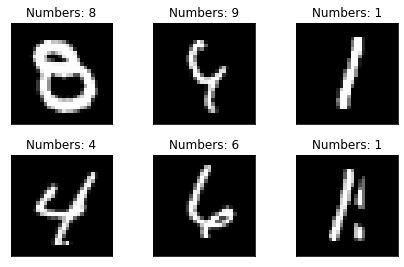

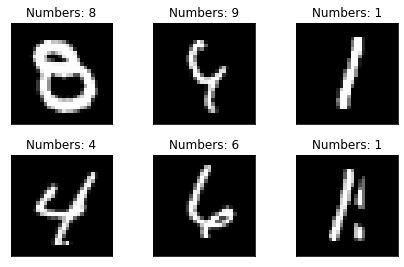

In [105]:
# Question 4 (cont'd)

import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Numbers: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [106]:
# Question 4 (cont'd)
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

In [107]:
# Question 4 (cont'd)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

In [108]:
# Question 4 (cont'd)
network = Net()
optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum)

In [109]:
# Question 4 (cont'd)
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

In [110]:
# Question 4 (cont'd)
def train(epoch):
  network.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = network(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))

In [111]:
# Question 4 (cont'd)
def test():
  network.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = network(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [112]:
# Question 4 (cont'd)
test()
for epoch in range(1, n_epochs + 1):
  train(epoch)
  test()


Test set: Avg. loss: 2.3075, Accuracy: 995/10000 (10%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.347681
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.276081
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.310248
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.283990
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.240932
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.286233
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.250043
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.118486
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.122125
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.031382
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.001630
Train Epoch: 1 [7040/60000 (12%)]	Loss: 1.787200
Train Epoch: 1 [7680/60000 (13%)]	Loss: 1.832807
Train Epoch: 1 [8320/60000 (14%)]	Loss: 1.640913
Train Epoch: 1 [8960/60000 (15%)]	Loss: 1.539867
Train Epoch: 1 [9600/60000 (16%)]	Loss: 1.296116
Train Epoch: 1 [10240/60000 (17%)]	Loss: 1.138391
Train Epoch: 1 [10880/60000 (18%)]	Loss: 1.151487
Train Epoch: 1 [11520/60000 (19%)]	Loss: 1.143081
Train Epoch: 1 [12160/

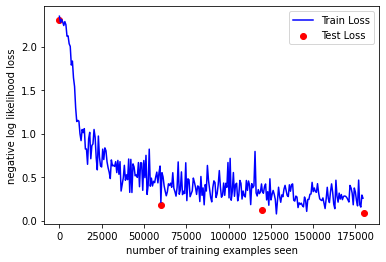

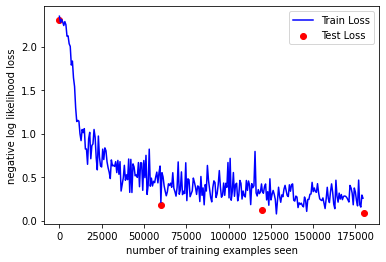

In [113]:
# Question 4 (cont'd)

fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
fig

In [114]:
# Question 4 (cont'd)

with torch.no_grad():
  output = network(example_data)

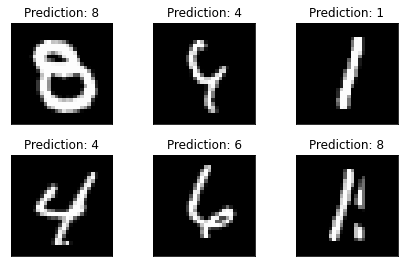

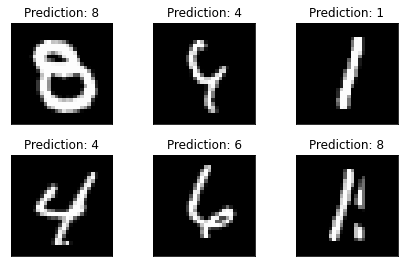

In [116]:
# Question 4 (cont'd)
# Plotting numbers

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Prediction: {}".format(
    output.data.max(1, keepdim=True)[1][i].item()))
  plt.xticks([])
  plt.yticks([])
fig

In [117]:
# Question 4 (cont'd)
# Running the training loop should immediately pick up the training 
# Checking epochs 10, 20.
for i in range(10,20):
  test_counter.append(i*len(train_loader.dataset))
  train(i)
  test()

Train Epoch: 10 [0/60000 (0%)]	Loss: 0.230574
Train Epoch: 10 [640/60000 (1%)]	Loss: 0.301766
Train Epoch: 10 [1280/60000 (2%)]	Loss: 0.289134
Train Epoch: 10 [1920/60000 (3%)]	Loss: 0.210101
Train Epoch: 10 [2560/60000 (4%)]	Loss: 0.392309
Train Epoch: 10 [3200/60000 (5%)]	Loss: 0.347668
Train Epoch: 10 [3840/60000 (6%)]	Loss: 0.203642
Train Epoch: 10 [4480/60000 (7%)]	Loss: 0.074514
Train Epoch: 10 [5120/60000 (9%)]	Loss: 0.270370
Train Epoch: 10 [5760/60000 (10%)]	Loss: 0.384034
Train Epoch: 10 [6400/60000 (11%)]	Loss: 0.223817
Train Epoch: 10 [7040/60000 (12%)]	Loss: 0.150747
Train Epoch: 10 [7680/60000 (13%)]	Loss: 0.313507
Train Epoch: 10 [8320/60000 (14%)]	Loss: 0.279784
Train Epoch: 10 [8960/60000 (15%)]	Loss: 0.313366
Train Epoch: 10 [9600/60000 (16%)]	Loss: 0.507516
Train Epoch: 10 [10240/60000 (17%)]	Loss: 0.316469
Train Epoch: 10 [10880/60000 (18%)]	Loss: 0.278827
Train Epoch: 10 [11520/60000 (19%)]	Loss: 0.215178
Train Epoch: 10 [12160/60000 (20%)]	Loss: 0.080352
Train Epo

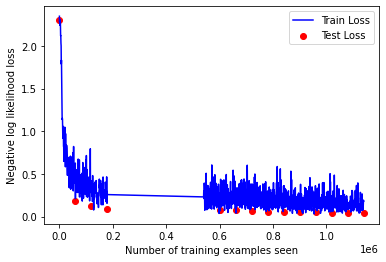

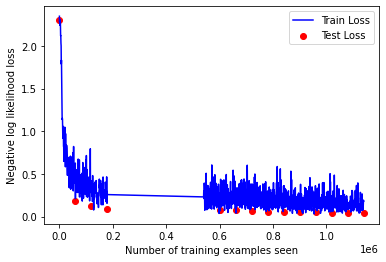

In [118]:
# Question 4 (cont'd)
# Visualize and comparing results in test accuracy over epochs

fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('Number of training examples seen')
plt.ylabel('Negative log likelihood loss')
fig

In [ ]:
# For grader use only

# insert grade here
# G[4,1] =   
# G[4,2] = 
# G[4,3] =


maxScore = maxScore + 16


In [ ]:
# for grader use

# Total Grade Calculation
rawScore = np.sum(G)
score = rawScore*100/maxScore